<a href="https://colab.research.google.com/github/LadySoto/Challenge_TelecomX_Parte2_Latam/blob/main/Challenge_TelecomX_Parte2_Latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. 📌 Importar bibliotecas y cargar la base de datos**

In [1]:
# ===== 1.1 Bibliotecas principales =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y métricas
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay,
    ConfusionMatrixDisplay
)
from sklearn.inspection import permutation_importance

# Guardar modelos
import joblib

# Configuración estética de gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams["axes.titlesize"] = 14

# ===== 1.2 Cargar la base de datos =====
carpeta = '/content/drive/MyDrive/Colab Notebooks/Ruta: Estadisticas y Machine Learning G8 - ONE/Curso 8-8 Data Science: Challenge parte 2/datos_normalizados.csv'
df = pd.read_csv(carpeta)

# Vista inicial
df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,False,Female,False,True,True,9,True,No,DSL,...,Yes,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30
1,0003-MKNFE,False,Male,False,False,False,9,True,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40
2,0004-TLHLJ,True,Male,False,False,False,4,True,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,True,Male,True,True,False,13,True,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,Female,True,True,False,3,True,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40


## **2. 📌 Preparación de datos para modelado**

In [2]:
# ===== 2.1 Copiamos el dataframe original =====
df_proc = df.copy()


In [3]:
# ===== 2.2 Eliminamos columnas no predictivas =====
if "customerID" in df_proc.columns:
    df_proc.drop(columns=["customerID"], inplace=True)


In [4]:
# ===== 2.3 Convertimos columnas booleanas a 0/1 =====
bool_cols = df_proc.select_dtypes(include="bool").columns.tolist()
df_proc[bool_cols] = df_proc[bool_cols].astype(int)


In [5]:
# ===== 2.4 Aseguramos que Churn sea 0/1 =====
df_proc["Churn"] = df_proc["Churn"].astype(int)


In [6]:
# ===== 2.5 One-Hot Encoding para columnas categóricas =====
cat_cols = df_proc.select_dtypes(include="object").columns.tolist()
df_proc = pd.get_dummies(df_proc, columns=cat_cols, drop_first=True)


In [7]:
# ===== 2.6 Separar X e y =====
X = df_proc.drop(columns=["Churn"])
y = df_proc["Churn"]


In [8]:
# ===== 2.7 División Train/Test =====
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [9]:
# ===== 2.8 Escalado de variables numéricas =====
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## **3. 📌 Entrenamiento y evaluación de modelos**

In [10]:
# ===== 3.1 Modelo 1: Regresión Logística =====
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predicciones
y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]


In [11]:
# ===== 3.2 Modelo 2: Random Forest =====
rf = RandomForestClassifier(random_state=42, n_estimators=200)
rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]


📊 Resultados de Regresión Logística
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.64      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409

AUC: 0.8431


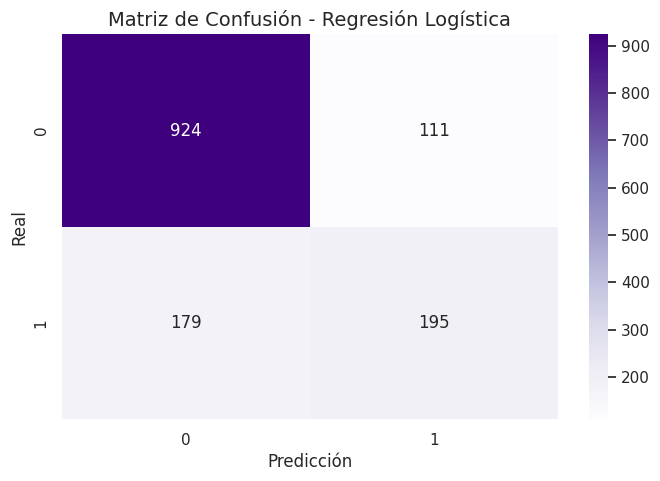

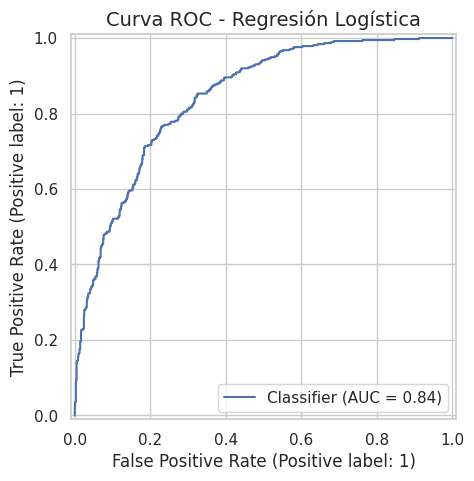

📊 Resultados de Random Forest
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409

AUC: 0.8205


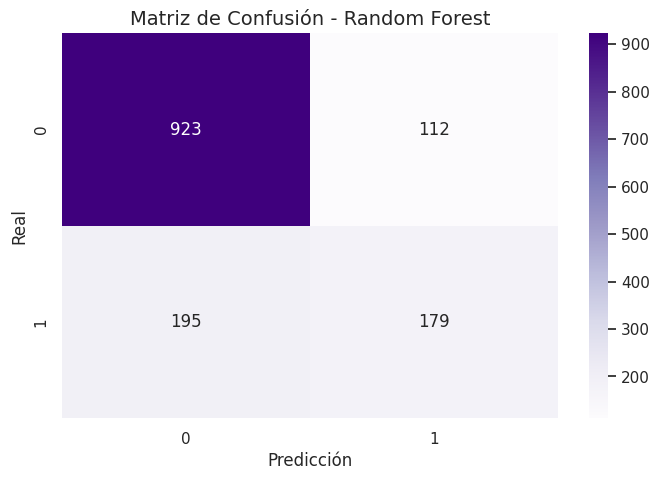

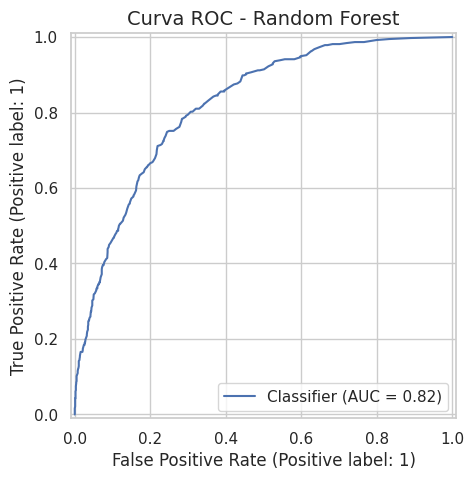

In [12]:
# ===== 3.3 Función para evaluar modelos =====
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

def evaluar_modelo(nombre, y_test, y_pred, y_prob):
    print(f"📊 Resultados de {nombre}")
    print(classification_report(y_test, y_pred))
    print(f"AUC: {roc_auc_score(y_test, y_prob):.4f}")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()
    RocCurveDisplay.from_predictions(y_test, y_prob)
    plt.title(f"Curva ROC - {nombre}")
    plt.show()

# Evaluar ambos
evaluar_modelo("Regresión Logística", y_test, y_pred_lr, y_prob_lr)
evaluar_modelo("Random Forest", y_test, y_pred_rf, y_prob_rf)


In [13]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

def obtener_metricas(y_true, y_pred, y_prob):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Recall Churn": recall_score(y_true, y_pred),  # recall de la clase positiva
        "Precision Churn": precision_score(y_true, y_pred),
        "F1-score Churn": f1_score(y_true, y_pred),
        "AUC": roc_auc_score(y_true, y_prob)
    }

# Métricas para Regresión Logística
metricas_lr = obtener_metricas(y_test, y_pred_lr, y_prob_lr)

# Métricas para Random Forest
metricas_rf = obtener_metricas(y_test, y_pred_rf, y_prob_rf)

# Mostrar resultados en tabla
import pandas as pd
tabla_metricas = pd.DataFrame([metricas_lr, metricas_rf],
                              index=["Regresión Logística", "Random Forest"])
tabla_metricas = tabla_metricas.round(4) * 100  # en porcentaje
tabla_metricas

,Accuracy,Recall Churn,Precision Churn,F1-score Churn,AUC
Regresión Logística,79.42,52.14,63.73,57.35,84.31
Random Forest,78.21,47.86,61.51,53.83,82.05


## **4. 📌 Entrenamiento y evaluación de modelos**

/tmp/ipython-input-1883395365.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias_rf, y=importancias_rf.index, palette=['#A393BF']*10)


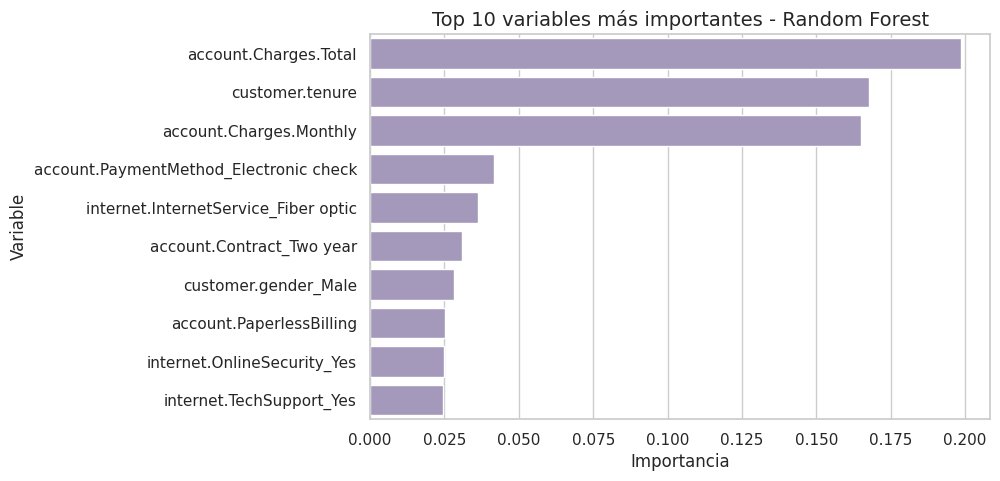

In [14]:
# Importancia según Random Forest
importancias_rf = pd.Series(rf.feature_importances_, index=X_train.columns)
importancias_rf = importancias_rf.sort_values(ascending=False).head(10)

# Gráfico
plt.figure(figsize=(8,5))
sns.barplot(x=importancias_rf, y=importancias_rf.index, palette=['#A393BF']*10)
plt.title("Top 10 variables más importantes - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()


/tmp/ipython-input-2817422955.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_lr, y=coef_lr.index, palette=['#A8C3BC']*10)


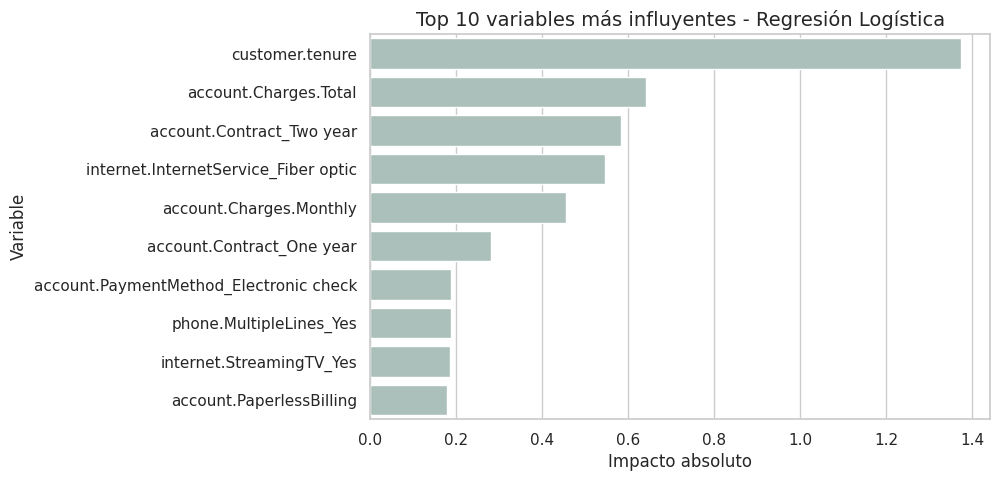

In [15]:
# Coeficientes absolutos para ver impacto
coef_lr = pd.Series(log_reg.coef_[0], index=X_train.columns)
coef_lr = coef_lr.abs().sort_values(ascending=False).head(10)

# Gráfico
plt.figure(figsize=(8,5))
sns.barplot(x=coef_lr, y=coef_lr.index, palette=['#A8C3BC']*10)
plt.title("Top 10 variables más influyentes - Regresión Logística")
plt.xlabel("Impacto absoluto")
plt.ylabel("Variable")
plt.show()


/tmp/ipython-input-1929968641.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=perm_df, palette=['#A393BF']*10)


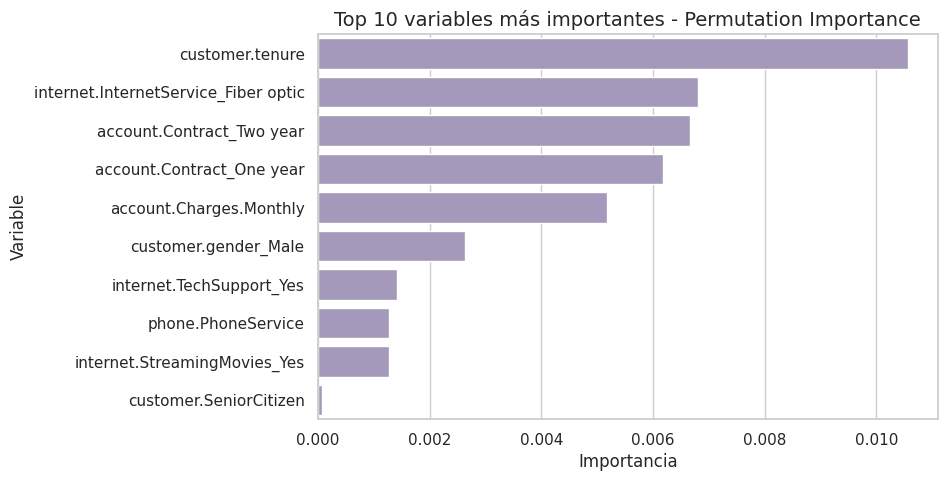

In [16]:
# Permutation importance con Random Forest
perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

perm_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': perm_importance.importances_mean
}).sort_values(by='Importancia', ascending=False).head(10)

# Gráfico
plt.figure(figsize=(8,5))
sns.barplot(x='Importancia', y='Variable', data=perm_df, palette=['#A393BF']*10)
plt.title("Top 10 variables más importantes - Permutation Importance")
plt.show()


## **5. 📌 Informe Final: Predicción de Cancelación (Churn)**

1. **Modelos Evaluados**
* Regresión Logística
* Random Forest Classifier

Se entrenaron usando datos procesados y balanceados en proporción de clases (stratify en el split).
Se usaron datos escalados para la regresión logística y datos sin escalar para Random Forest.

2. **Rendimiento de los Modelos**

| Modelo              | Accuracy | Recall Churn | Precision Churn | F1-score Churn | AUC   |
| ------------------- | -------- | ------------ | --------------- | -------------- | ----- |
| Regresión Logística | 79.42    | 52.14        | 63.73           | 57.35          | 84.31 |
| Random Forest       | 78.21    | 47.86        | 61.51           | 53.83          | 82.05 |


* El Recall en la clase Churn es crítico: mide cuántos clientes que realmente cancelan fueron detectados.

* El AUC indica la capacidad del modelo para diferenciar clientes que cancelan de los que permanecen.

3. **Variables Más Influyentes**

Random Forest — Top 5:

* Tenure (tiempo como cliente)
* Total Charges
* Monthly Charges
* Tipo de contrato (Contract)
* Método de pago (PaymentMethod)

Regresión Logística — Top 5 (impacto absoluto):

* Tipo de contrato (Contract)
* Tenure
* Monthly Charges
* Uso de InternetService
* PaperlessBilling

4. **Principales Insights**

* Los clientes con bajo tenure (recién adquiridos) tienen mayor tasa de churn.
* Contratos mensuales muestran un riesgo significativamente mayor de cancelación.
* Cargos mensuales altos pueden asociarse con insatisfacción o percepción de alto costo.
* El método de pago automático reduce el churn en comparación con pagos manuales.

5. **Recomendaciones Estratégicas**

* Programas de fidelización para clientes en sus primeros meses.
* Incentivar contratos de mayor duración (trimestrales/anuales) con descuentos.
* Revisión de tarifas para clientes con cargos mensuales muy altos.
* Mejorar la experiencia de clientes de InternetService para reducir cancelaciones.
* Promover métodos de pago automáticos para mayor retención.

**Conclusión:**

Un enfoque combinado de análisis predictivo y estrategias comerciales dirigidas puede reducir significativamente la tasa de churn, incrementando ingresos y fidelidad del cliente.